## Customer churn detection

Objectives
I will explore the data and try to answer some questions like:

* What's the % of Churn Customers and customers that keep in with the active services?
* Is there any patterns in Churn Customers based on the gender?
* Is there any patterns/preference in Churn Customers based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Many more questions that will arise during the analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Documents\Projects\Datasets\customer_churn.csv')
print(df.shape)

(7043, 21)


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df = df.drop(columns=['customerID'])

In [6]:
df['TotalChargesNumeric'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
Churn                   0
TotalChargesNumeric    11
dtype: int64

In [7]:
list = []

for i in df.TotalCharges:

    try:
        float(i)
    except:
        list.append(i)

list

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

In [8]:
df[pd.to_numeric(df['TotalCharges'], errors = 'coerce').isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesNumeric
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,NaN
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,NaN
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,NaN
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,NaN
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,NaN
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,NaN
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,NaN
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,NaN
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,NaN
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,NaN


In [9]:
df.loc[:5,:]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesNumeric
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,820.50


It looks like when tenure is 0, there is no information for "Total charges"

In [10]:
df[df['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesNumeric
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,NaN
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,NaN
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,NaN
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,NaN
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,NaN
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,NaN
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,NaN
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,NaN
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,NaN
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,NaN


Let's see if  all the blanks in TotalCharges, coincide with Tenure equals 0.

In [11]:
all(df[pd.to_numeric(df['TotalCharges'], errors = 'coerce').isna()].index == df[df['tenure'] == 0].index)

True

Let's drop the rows where there is  no data for TotalCharges or where Tenure equals to 0.

In [12]:
df = df[df['tenure'] != 0]

In [13]:
#Validation of all rows with tenure=0 are gone.
df[df['tenure'] == 0].index

Index([], dtype='int64')

Making sure there are no NaN values anymore.

In [14]:
df.isnull().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
TotalChargesNumeric    0
dtype: int64

In [15]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesNumeric
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65


In [16]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [17]:
df["InternetService"].describe()

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [18]:
#Converting original col into numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [19]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


###  Visualization

In [20]:
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#### Gender and Churn Distributions

In [21]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [22]:
df[df['Churn'] == 'Yes'].groupby(['gender'])['Churn'].count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [23]:
df[df['Churn'] == 'No'].groupby(['gender'])['Churn'].count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

There is a similar proportion of males and females in any case, in case they churn or not.

#### Customer contract distrubution

In [24]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [25]:
df[df['Churn'] == 'No']['Contract'].value_counts() / df['Contract'].value_counts() *100

Contract
Month-to-month    57.290323
Two year          97.151335
One year          88.722826
Name: count, dtype: float64

In [26]:
df[df['Churn'] == 'Yes']['Contract'].value_counts() / df['Contract'].value_counts() *100

Contract
Month-to-month    42.709677
One year          11.277174
Two year           2.848665
Name: count, dtype: float64

- Month-to-month - 42% of customers opted to move out
- One year - 11% of customers opted to move out
- Two year - 3% of customers opted to move out

So it's clearly observable, that the probability of churn of customers in a one-year or two-years contract is very low compared to month-to-month contracts.

#### Payment method distribution

In [27]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

#### Churn distribution w/Partners

In [28]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers that doesn't have partners are more likely to churn


#### Monthly charges distribution

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33120\2576396580.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33120\2576396580.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




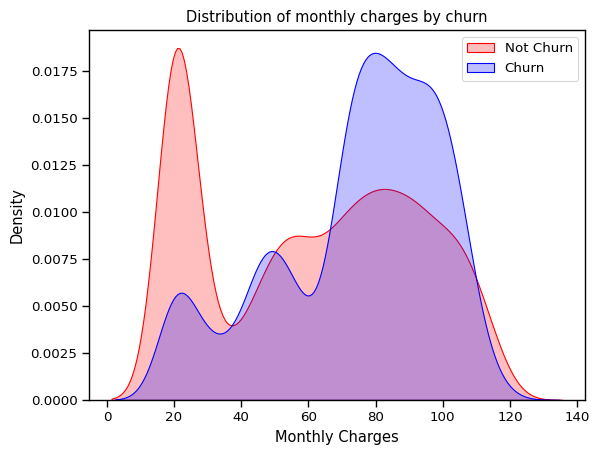

In [29]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

* Customers with higher Monthly Charges are also more likely to churn


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33120\2062861112.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33120\2062861112.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




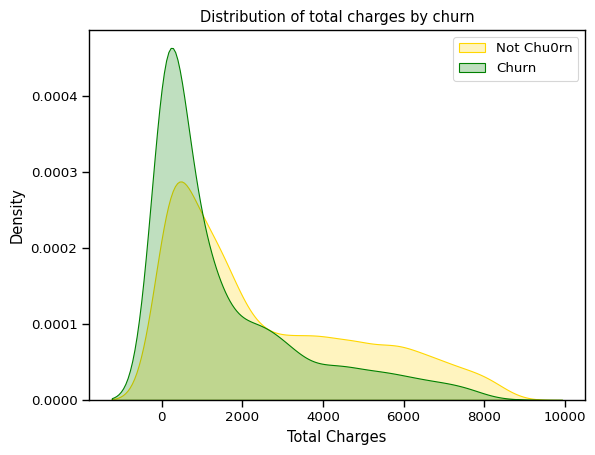

In [30]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

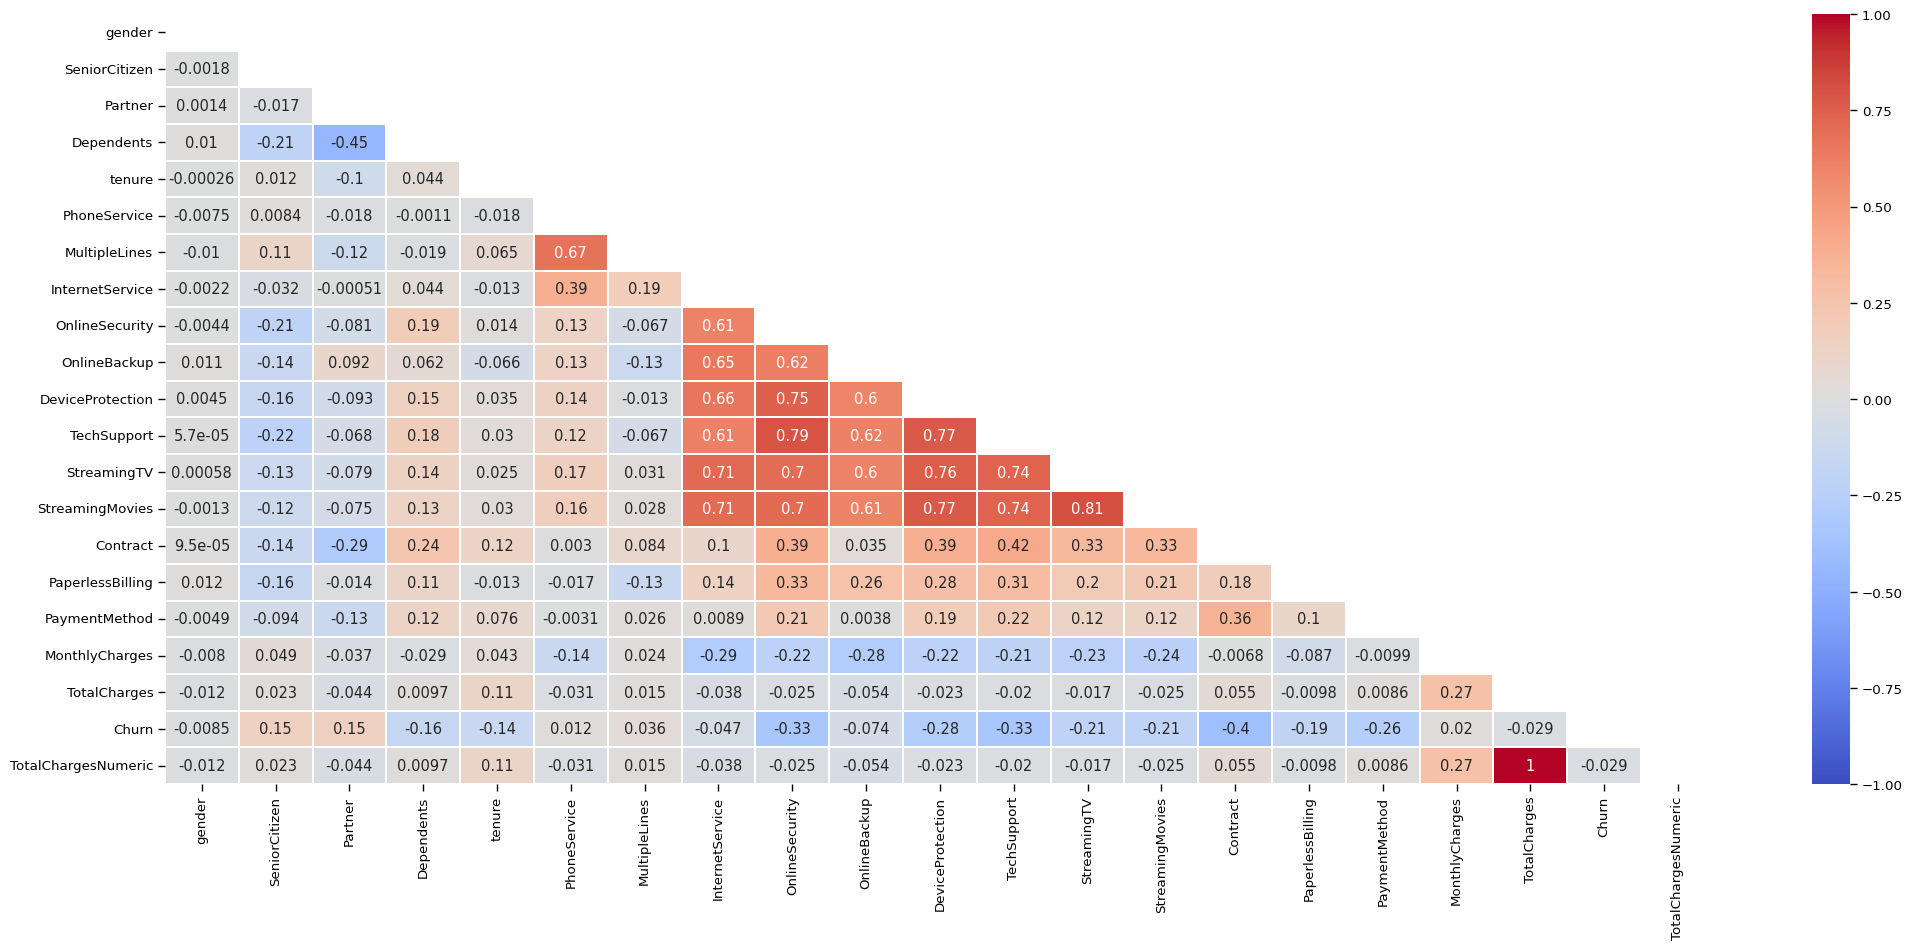

In [31]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

### Data preprocessing

Splitting the data into train and test sets

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [34]:
LabelEncoder().fit_transform(df['gender'])

array([0, 1, 1, ..., 0, 1, 1])

In [35]:
df_ = df.apply(lambda x: object_to_int(x))
df_.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesNumeric
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,29.85
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,1889.50
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,108.15
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,1840.75
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,151.65


In [36]:
plt.figure(figsize=(14,7))
df_.corr()['Churn'].sort_values(ascending = False)

Churn                  1.000000
MonthlyCharges         0.192858
PaperlessBilling       0.191454
SeniorCitizen          0.150541
PaymentMethod          0.107852
MultipleLines          0.038043
PhoneService           0.011691
gender                -0.008545
StreamingTV           -0.036303
StreamingMovies       -0.038802
InternetService       -0.047097
Partner               -0.149982
Dependents            -0.163128
DeviceProtection      -0.177883
OnlineBackup          -0.195290
TotalChargesNumeric   -0.199484
TotalCharges          -0.199484
TechSupport           -0.282232
OnlineSecurity        -0.289050
tenure                -0.354049
Contract              -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [37]:
X = df_.drop(columns = ['Churn'])
y = df_['Churn'].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)


In [39]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33120\3330901477.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33120\3330901477.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33120\3330901477.py:4: UserWarning:



`distplot`

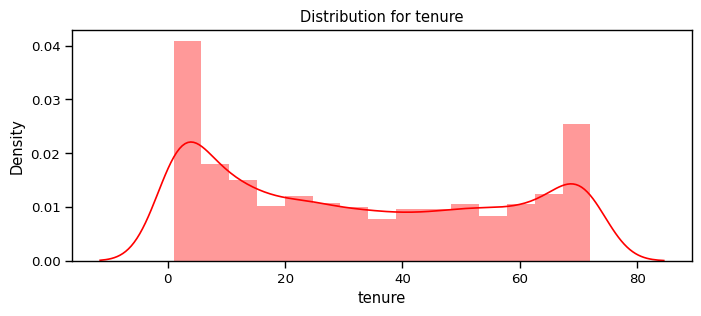

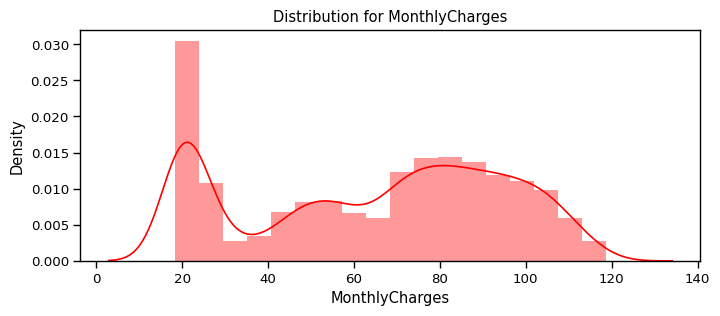

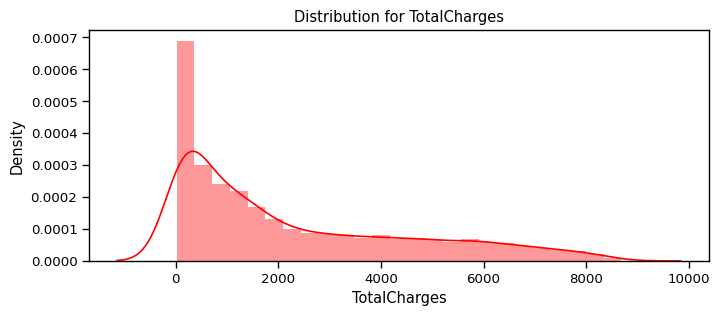

In [48]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df_)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33120\3330901477.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33120\3330901477.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33120\3330901477.py:4: UserWarning:



`distplot`

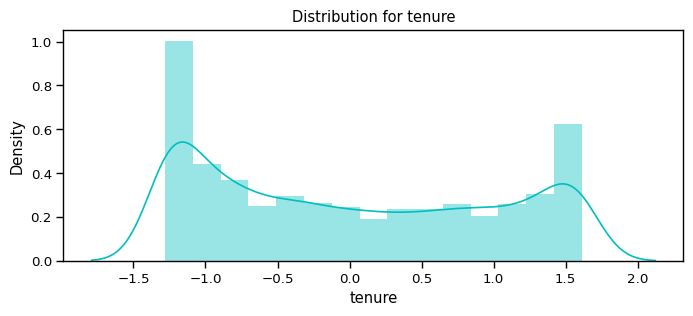

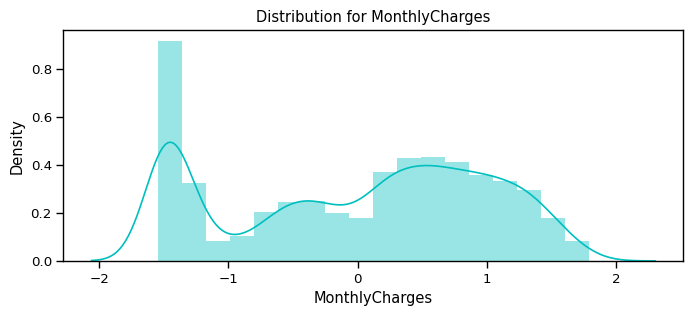

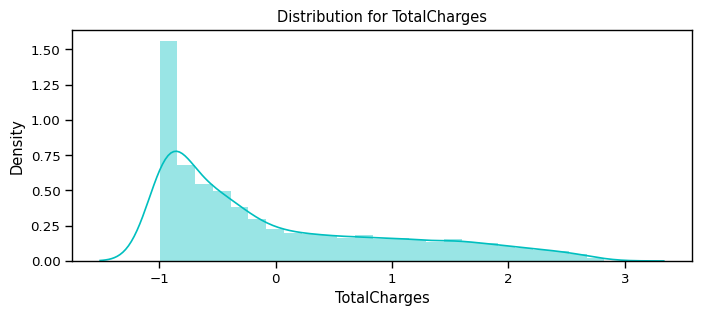

In [49]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df_[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [50]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe))#those that need label encoding

TypeError: 'list' object is not callable

In [51]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Machine Learning Model

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [53]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7630331753554502


In [54]:
print(classification_report(y_test, predicted_y))


              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1549
           1       0.65      0.24      0.35       561

    accuracy                           0.76      2110
   macro avg       0.71      0.60      0.60      2110
weighted avg       0.74      0.76      0.72      2110



In [55]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7341232227488151


In [58]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = 100000,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8004739336492891


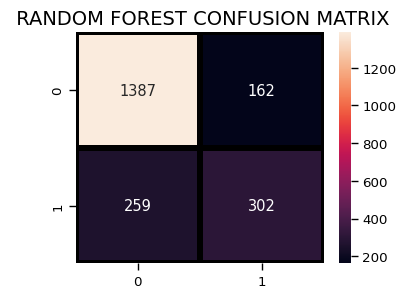

In [59]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

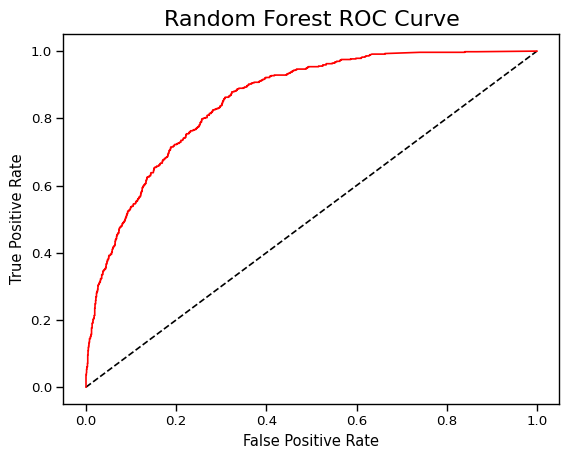

In [60]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [63]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8080568720379147


In [64]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.718957345971564


In [65]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8127962085308057

In [66]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8075829383886256


In [67]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.814218009478673
